## PHYS-243 Spring 2019 - Brandon Evans - Homework 2
#### Dr. Mobasher, TA Abtin Shahidi
#### 20-Apr-2019

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import math

#Function from Abtin's lecture:
def Gaussian_prob(x, _mu=0, _sigma=1):
    """Gaussian disturbution: probability of getting x given mu=_mu, sigma=_sigma"""
    return (1/np.sqrt(2*np.pi*_sigma**2))*np.exp(-(x-_mu)**2/(2*_sigma**2))
#Add Poisson to test
def Poisson_prob(lamb,k):
    return (np.exp(-lamb)*lamb**k/math.factorial(k))

### Problem 1 - Traffic Forecasting
#### Assumptions:
*  We have one hour of data, from a day with rush hour traffic
*  Rush hour will be the peak of the data, and we'll consider that the median
*  Measurements are independent
*  Poisson distribution is appropriate to describe


Mean:14.0 Range:17.0 StdDev:4.26 Sum:154


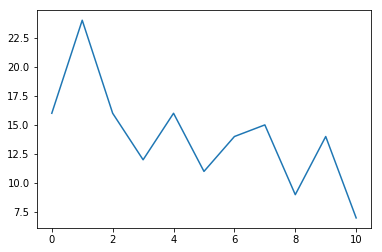

In [41]:
#Basic review of sample data
rush_hour = np.array([16, 24, 16, 12, 16, 11, 14, 15, 9, 14, 7])
u = np.mean(rush_hour)
std = np.std(rush_hour)
print ("Mean:{0:0.1f} Range:{1:0.1f} StdDev:{2:0.2f} Sum:{3:0.0f}"
       .format(u,np.ptp(rush_hour),std,np.sum(rush_hour)))
plt.plot(rush_hour)

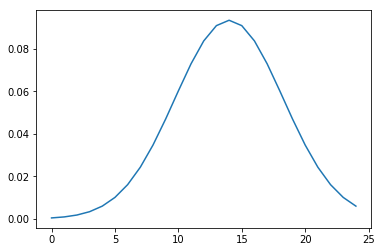

In [51]:
#Gaussian Testing
x = np.arange(0,25,1)
y = np.zeros(len(x))
for i in x:
    y[i] = Gaussian_prob(i,u,std)
plt.plot(x,y)

In [43]:
#Understand Abtin's code:
m_X_span= np.arange(0, 25, 0.001)
nLoops = 0
for i, m in enumerate(m_X_span):
    nLoops = nLoops+1
print(i,m,nLoops)

24999 24.999 25000


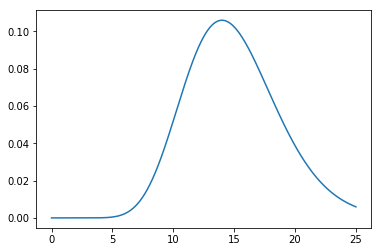

In [48]:
#Poisson

#Calculate lambda parameter for Poisson func
#I think for the number of events K, we should use mean of sample data

x = np.arange(0, 25, 0.001)
y = np.zeros(len(x))
for i, m in enumerate(x):
    y[i] = Poisson_prob(m,14)
plt.plot(x,y)

### Problem 2
Process vectors of $\mu$ and $\sigma$

Test that $\sigma=\frac{1}{\sigma_1^2}+\frac{1}{\sigma_2^2}$ agrees with $\sigma=\frac{\sigma_1\sigma_2}{\sqrt{\sigma_1^2+\sigma_2^2}}$

In [8]:
#Sanity check, given any sig1,sig2
sig1 = 3
sig2 = 4
siga = 1/sig1**2 + 1/sig2**2
sigb = (sig1*sig2) / np.sqrt(sig1**2+sig2**2)
#Invert siga
siga = np.sqrt(1/siga)
print(siga,sigb)

2.4 2.4


Let's think about solution for $\mu$.

$\mu$ has a dependence on $\sigma$ so I think we can first solve for $\sigma$ than substitute in our solution for $\mu$.  <br>
But first, let's show Abtin's form...
$\mu=\frac{\mu_1\sigma_2^2+\mu_2\sigma_1^2}{\sigma_1^2+\sigma_2^2}$

Since we know $\sigma$ inverse form, can we replace denominator of $\mu$ equation, something like:<br>
$\mu=\sigma^2\begin{bmatrix}\frac{\mu_1}{\sigma_1^2}+\frac{\mu_2}{\sigma_2^2}+...\end{bmatrix}$<br>
<br>**Abtin, I confess, I need to work to be more fluent in reworking the equations, they take me a lot of time, would appreciate any helpful reads or advice.**

In [9]:
#Sanity check, do equations match:
sig1 = 3
sig2 = 4
sigsq = 1 / (1/sig1**2 + 1/sig2**2)
mu1 = 8
mu2 = 10
mu_a = (mu1*sig2**2+mu2*sig1**2)/(sig1**2+sig2**2)
mu_b = sigsq * ((mu1/sig1**2)+(mu2/sig2**2))

In [7]:
print(mu_a,mu_b)

8.72 8.719999999999999


#### At least, create our final function

In [28]:
def gaussian_solver(vec_mu, vec_sigma):
    #Test for equal vectors, we need this right?
    if len(vec_mu) != len(vec_sigma):
        raise ValueError('Vectors not equal length.')
    
    sigsq = 0
    mu = 0
    for i in range(0,len(v_mu)):
        sigsq = sigsq + 1/vec_sigma[i]**2
        mu = mu + vec_mu[i]/vec_sigma[i]**2
    #To make function more efficient, we did mu inner equation previously, now just multiply by sigma^2
    mu = (1/sigsq)*mu
    return mu,(np.sqrt(1/sigsq))

#Test with our previous values that we know worked:
v_mu = np.array([8,10])
v_sigma = np.array([3,4])
gaussian_solver(v_mu,v_sigma)



(8.7199999999999989, 2.3999999999999999)